In [20]:
import numpy as np
import os
import matplotlib.pyplot as plt
import json

In [21]:
#sub_dir = '/volatile/jl277509/Runs/02_STS_babies/Program/Output/2024-02-26/'
sub_dir = '/volatile/jl277509/Runs/02_STS_babies/Program/Output/SimCLR_OFC_1-5mm/'

In [22]:
#models = ['17-16-30_112', '18-37-28_0', '18-37-28_1', '18-37-28_2', '18-37-28_3', '18-37-28_4']
#models = ['14-35-49_163', '21-38-51_0', '21-38-51_1', '21-38-51_2', '21-38-51_3']
#models = ['11-45-15_0', '11-45-15_1', '11-45-15_2', '11-45-15_3', '11-45-15_4']
#models = ['19-57-02_0', '19-57-02_1', '19-57-02_2']
#models = ['12-12-35_0']
#models = ['14-17-27_0', '14-17-27_1', '14-17-27_2', '14-17-27_3']
#models = ['16-44-39_0', '16-44-39_1', '16-44-39_2', '16-44-39_3']
#models = ['17-19-54_0', '17-19-54_1', '17-19-54_2', '17-19-54_3']
#models = ['random_all_keep_bottom_5', 'random_all_keep_bottom_6', 'random_all_keep_bottom_7', 'random_all_keep_bottom_8', 'random_all_keep_bottom_9', 'random_all_keep_bottom_10']
#models = ['14-17-27_0', '14-17-27_1', '14-17-27_2', '14-17-27_3']
#models = [f'1-5mm_L4_{k}' for k in range(5)]
#models = [f'16-36-43_{k}' for k in range(3)]
#models = [f'14-06-51_{k}' for k in range(3)]
#models = [f'15-58-57_{k}' for k in range(3)]
models = [f'16-54-10_{k}' for k in range(4)] + [f'20-17-23_{k}' for k in range(2)]
epochs = [k for k in range(0, 250, 10)]
#models = ['random_all_keep_bottom_5']
#epochs = [k for k in range(0, 250)]

In [23]:
# Preterms
#embeddings = ['dHCP', 'dHCP', 'dHCP', 'dHCP', 'dHCP', 'dHCP', 'dHCP','UKB_5percent', 'UKB_5percent']
#labels = ['Preterm_28', 'Preterm_32', 'Preterm_37', 'Preterm_23-28_vs_fullterm', 'Preterm_23-32_vs_fullterm',
#          'Preterm_28-32_vs_fullterm', 'Preterm_32-37_vs_fullterm','Age', 'Sex']
#sets = ['full', 'full', 'full', 'train_val', 'train_val', 'train_val', 'train_val', 'train_val', 'train_val']
#sets = ['full', 'full', 'full', 'full', 'full', 'full', 'full', 'train_val', 'train_val']
#sets = ['full' for k in range(9)]
#colors = ['darkred', 'orangered', 'royalblue', 'deepskyblue', 'darkgreen', 'gold', 'yellowgreen', 'black', 'gray']
plot_style='individual'

# PCS
#embeddings=['ACC_custom']
#labels=['Right_PCS']
#sets = ['test']
#colors = ['royalblue']
plot_style='unique'

# OFC (troiani)
embeddings=['troiani']
labels=['Left_OFC']
sets=['test']
colors=['royalblue']
plot_style='unique'

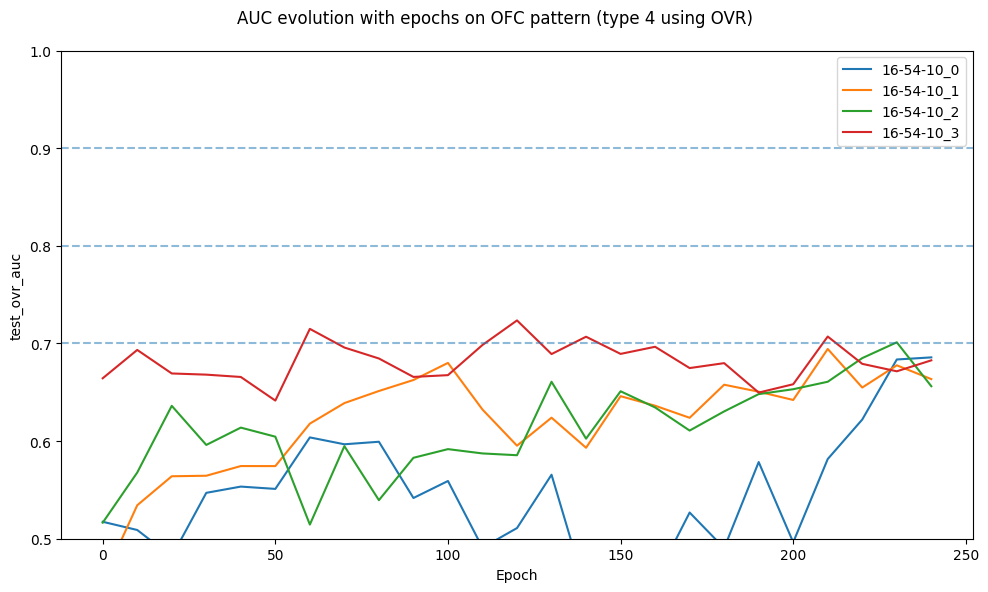

In [39]:
## MODELS ON SAME PLOT

fig, ax = plt.subplots(figsize=(10,6))

for embedding, label, s in zip(embeddings, labels, sets):
    metric, target = f'{s}_auc', f'{s}_values.json'
    selected_models_dirs = [root for root, dirs, files in os.walk(sub_dir, followlinks=True)
                                    if (target in files) & (root.endswith(label)) & (embedding in root) & ('best_model' not in root)]
    dict_perf = {model : [] for model in models}
    dict_perf['epoch'] = []
    for model in models:
        for epoch in epochs:
            for directory in selected_models_dirs:
                if ('epoch'+str(epoch)+'_' in directory) and (model in directory):
                    with open(os.path.join(directory,target), 'r') as f:
                        perf = json.load(f)
                    if isinstance(perf[metric], float):
                        value = perf[metric]
                    else:
                        value = perf[metric][0]
                    dict_perf['epoch'].append(epoch)
                    dict_perf[model].append(value)
    for i, model in enumerate(models):
        if model in dict_perf.keys():
            x, y = epochs, dict_perf[model]
            if i==0:
                ax.plot(x[:len(y)], y, label=model)
            else:
                ax.plot(x[:len(y)], y, label=model)

ax.axline((0, 0.90), (1, 0.90), linestyle='--', alpha=0.5)
ax.axline((0, 0.80), (1, 0.80), linestyle='--', alpha=0.5)
ax.axline((0, 0.70), (1, 0.70), linestyle='--', alpha=0.5)
ax.set_xlabel('Epoch')
ax.set_ylabel(metric)
ax.legend()
ax.set_ylim([0.5, 1])
plt.suptitle(f'AUC evolution with epochs on OFC pattern (average using OVR)')
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


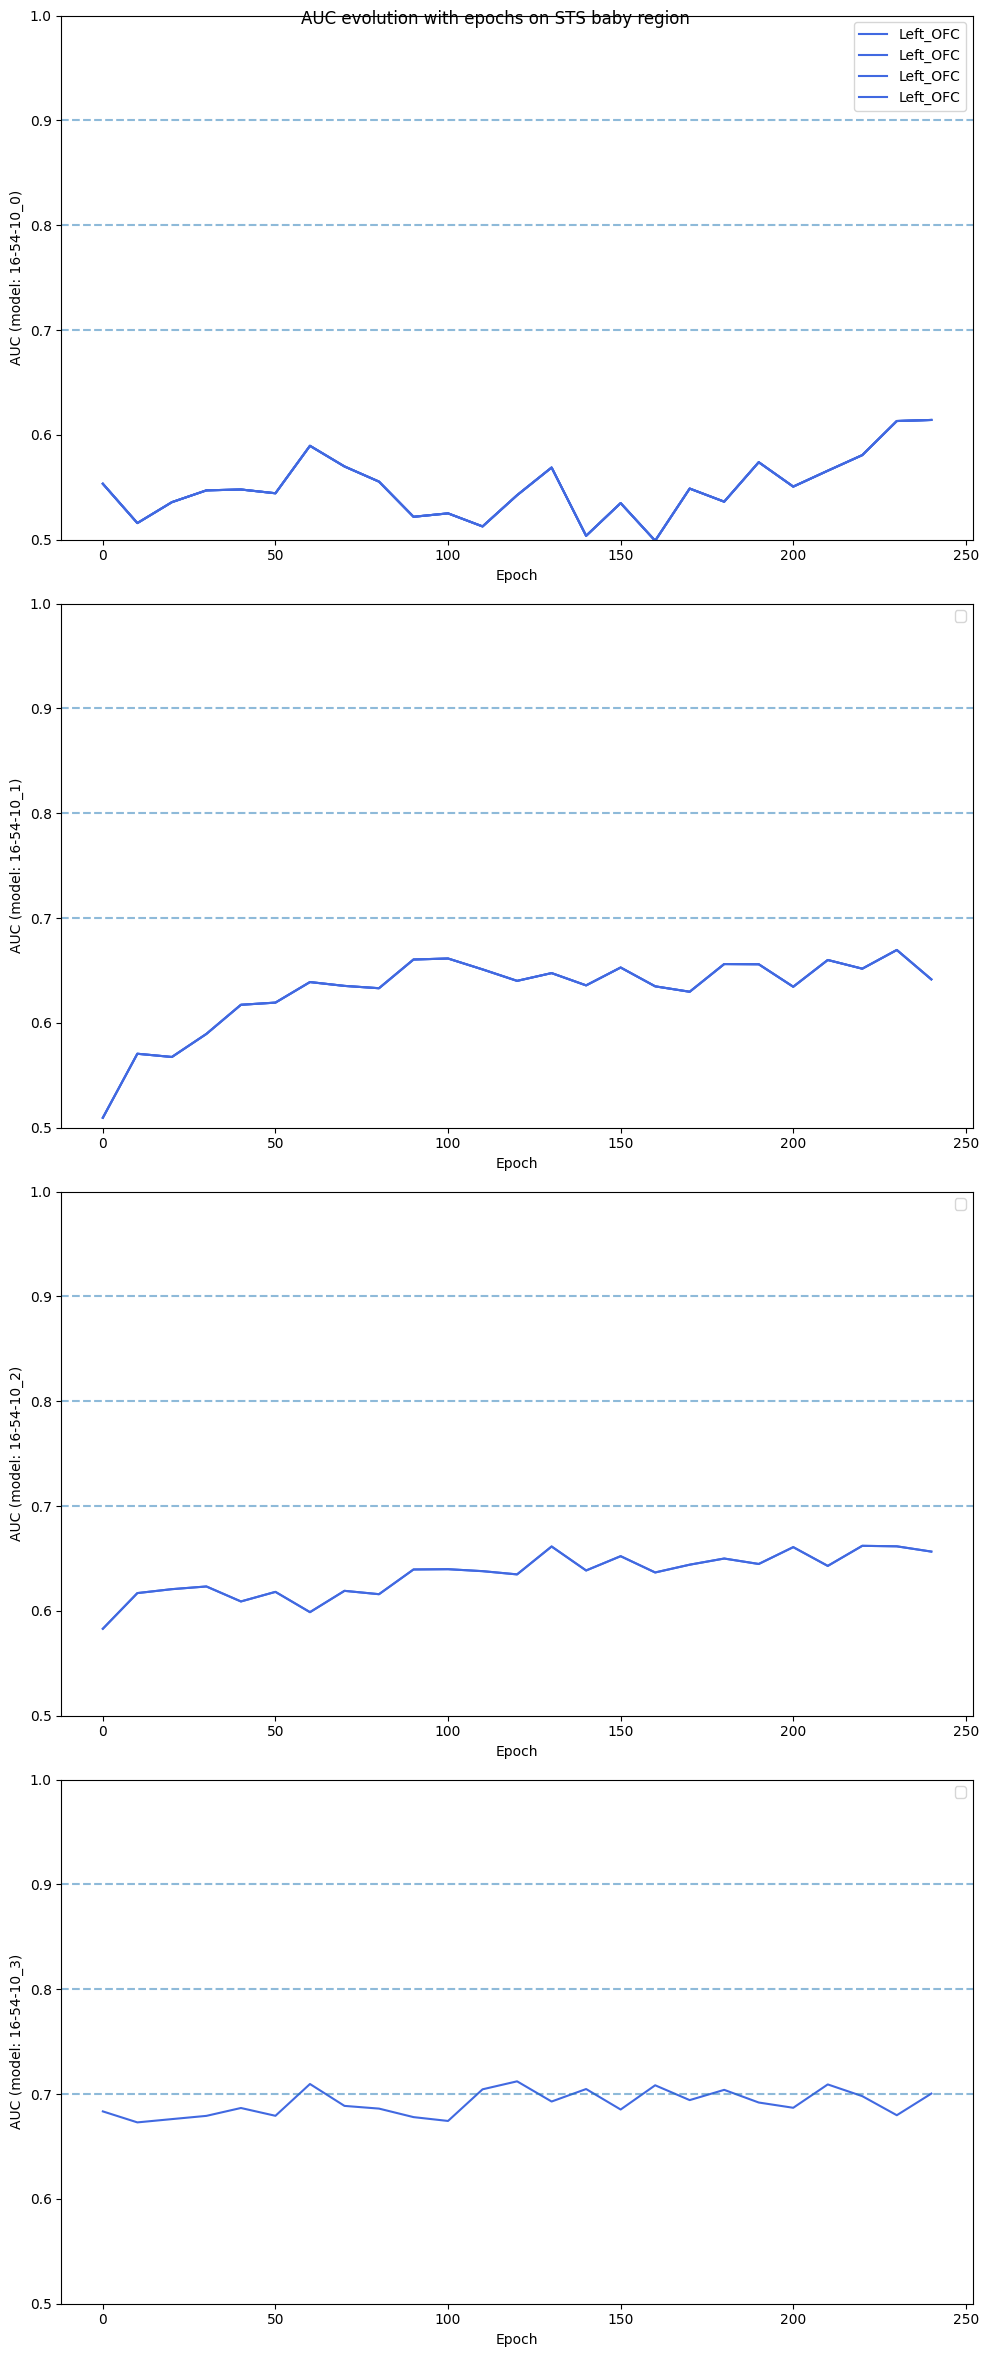

In [29]:
### MODELS ON INDIVIDUAL PLOTS

fig, axs = plt.subplots(figsize=(10,6*len(models)), nrows=len(models))

for embedding, label, s, c in zip(embeddings, labels, sets, colors):
    metric, target = f'{s}_auc', f'{s}_values.json'
    selected_models_dirs = [root for root, dirs, files in os.walk(sub_dir, followlinks=True)
                                    if (target in files) & (root.endswith(label)) & (embedding in root) & ('best_model' not in root)]
    dict_perf = {model : [] for model in models}
    dict_perf['epoch'] = []
    for model in models:
        for epoch in epochs:
            for directory in selected_models_dirs:
                if ('epoch'+str(epoch)+'_' in directory) and (model in directory):
                    with open(os.path.join(directory,target), 'r') as f:
                        perf = json.load(f)
                    if isinstance(perf[metric], float):
                        value = perf[metric]
                    else:
                        value = perf[metric][0]
                    dict_perf['epoch'].append(epoch)
                    dict_perf[model].append(value)
        for i, model in enumerate(models):
            if model in dict_perf.keys():
                if len(models)==1:
                    ax=axs
                else:
                    ax=axs[i]
                x, y = epochs, dict_perf[model]
                if i==0:
                    ax.plot(x[:len(y)], y, label=label, c=c)
                else:
                    ax.plot(x[:len(y)], y, c=c)

for i, model in enumerate(models):
    if len(models)==1:
        ax=axs
    else:
        ax=axs[i]
    ax.axline((0, 0.90), (1, 0.90), linestyle='--', alpha=0.5)
    ax.axline((0, 0.80), (1, 0.80), linestyle='--', alpha=0.5)
    ax.axline((0, 0.70), (1, 0.70), linestyle='--', alpha=0.5)
    ax.set_xlabel('Epoch')
    ax.set_ylabel(f'AUC (model: {model})')
    ax.legend()
    ax.set_ylim([0.5, 1])
plt.suptitle(f'AUC evolution with epochs on STS baby region')
plt.tight_layout()
plt.show()